In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF

def get_session(gpu_fraction=0.3):
    '''Assume that you have 6GB of GPU memory and want to allocate ~2GB'''

    num_threads = os.environ.get('OMP_NUM_THREADS')
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction)

    if num_threads:
        return tf.Session(config=tf.ConfigProto(
            gpu_options=gpu_options, intra_op_parallelism_threads=num_threads))
    else:
        return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


KTF.set_session(get_session())

Using TensorFlow backend.


In [4]:
!nvidia-smi

Mon Nov 20 20:11:42 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.90                 Driver Version: 384.90                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    58W / 149W |   7100MiB / 11439MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [5]:
import os
import re
import json

import unet
import dataset
import train_test_loader
import learning_experiment as lexperiment

import datetime

from shutil import copyfile

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
DESCRIPTION = u"""
Попробуем квадратичный loss
Experiment_2017_11_20_17
"""
experiment = lexperiment.create_experiment(DESCRIPTION, 
                               dataset.DataSet("./dataset/trainset", [dataset.ChannelMUL_PanSharpen], image_size=(240,240)))

Create experiment in directory: ./experiments/2017-11-20 20:12:38.876558


In [13]:
data_set = experiment.data_set

In [14]:
train_ids, test_ids = train_test_loader.load_train_test()

In [15]:
net = unet.UnetModel(data_set.shape)

In [16]:
from keras.optimizers import Adam, Nadam

In [17]:
net.compile(optimizer=Nadam(lr=1e-4), loss='mean_squared_error')

In [18]:
batch_generator = lexperiment.BatchGenerator(data_set, train_ids, 
                                      random_rotate=True, 
                                      shuffle_on_each_epoch=True, 
                                      random_translate=True)

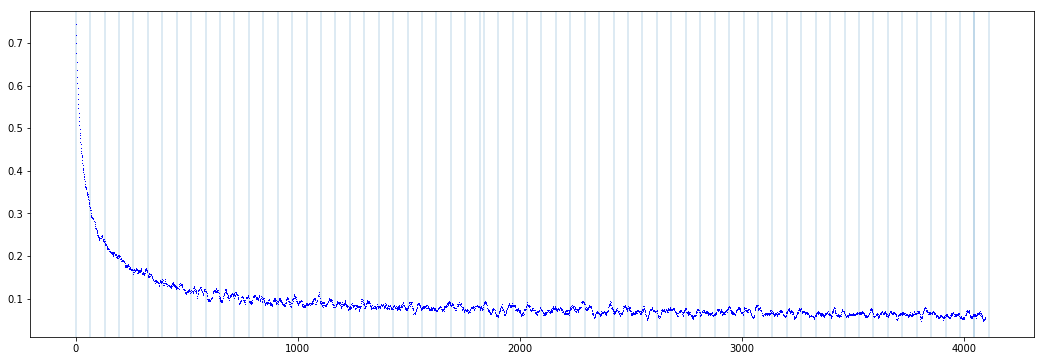

In [22]:
plt.figure(figsize=(18,6))
lexperiment.plot_loss(net, window_size=15)

In [19]:
experiment.train(net, batch_generator, epochs=60)

epoch: 0, loss: 0.258169
epoch: 0, loss: 0.250726
epoch: 0, loss: 0.243969
epoch: 0, loss: 0.241727
epoch: 0, loss: 0.235744
epoch: 0, loss: 0.240726
epoch: 0, loss: 0.230556
epoch: 0, loss: 0.226752
epoch: 0, loss: 0.216517
epoch: 0, loss: 0.219138
epoch: 0, loss: 0.218936
epoch: 0, loss: 0.212396
epoch: 0, loss: 0.205508
epoch: 0, loss: 0.210008
epoch: 0, loss: 0.198672
epoch: 0, loss: 0.190930
epoch: 0, loss: 0.192425
epoch: 0, loss: 0.187620
epoch: 0, loss: 0.185177
epoch: 0, loss: 0.186500
epoch: 0, loss: 0.177573
epoch: 0, loss: 0.177249
epoch: 0, loss: 0.175349
epoch: 0, loss: 0.177060
epoch: 0, loss: 0.168746
epoch: 0, loss: 0.166673
epoch: 0, loss: 0.165427
epoch: 0, loss: 0.169717
epoch: 0, loss: 0.160572
epoch: 0, loss: 0.157094
epoch: 0, loss: 0.159636
epoch: 0, loss: 0.147618
epoch: 0, loss: 0.142623
epoch: 0, loss: 0.154133
epoch: 0, loss: 0.148146
epoch: 0, loss: 0.148573
epoch: 0, loss: 0.137891
epoch: 0, loss: 0.137381
epoch: 0, loss: 0.128376
epoch: 0, loss: 0.138746


epoch: 5, loss: 0.032790
epoch: 5, loss: 0.038131
epoch: 5, loss: 0.047009
epoch: 5, loss: 0.052826
epoch: 5, loss: 0.043409
epoch: 5, loss: 0.062733
epoch: 5, loss: 0.035371
epoch: 5, loss: 0.053730
epoch: 5, loss: 0.039554
epoch: 5, loss: 0.067683
epoch: 5, loss: 0.064881
epoch: 5, loss: 0.080927
epoch: 5, loss: 0.031982
epoch: 5, loss: 0.065244
epoch: 5, loss: 0.028856
epoch: 5, loss: 0.046967
epoch: 5, loss: 0.032950
epoch: 5, loss: 0.045883
epoch: 5, loss: 0.042583
epoch: 5, loss: 0.043036
epoch: 5, loss: 0.033746
epoch: 5, loss: 0.043518
epoch: 5, loss: 0.053071
epoch: 5, loss: 0.046675
epoch: 5, loss: 0.053444
epoch: 5, loss: 0.057233
epoch: 5, loss: 0.059250
epoch: 5, loss: 0.037295
epoch: 5, loss: 0.058804
epoch: 5, loss: 0.059054
epoch: 5, loss: 0.047302
epoch: 5, loss: 0.045272
epoch: 5, loss: 0.050450
epoch: 5, loss: 0.041483
epoch: 5, loss: 0.035687
epoch: 5, loss: 0.053015
epoch: 5, loss: 0.043536
epoch: 5, loss: 0.048788
epoch: 5, loss: 0.044582
epoch: 5, loss: 0.047603


epoch: 10, loss: 0.021212
epoch: 10, loss: 0.033571
epoch: 10, loss: 0.034299
epoch: 10, loss: 0.049175
epoch: 10, loss: 0.035821
epoch: 10, loss: 0.027344
epoch: 10, loss: 0.027283
epoch: 10, loss: 0.030419
epoch: 10, loss: 0.044976
epoch: 10, loss: 0.037990
epoch: 10, loss: 0.049105
epoch: 10, loss: 0.042421
epoch: 10, loss: 0.057355
epoch: 10, loss: 0.049440
epoch: 10, loss: 0.058844
epoch: 10, loss: 0.038672
epoch: 10, loss: 0.035602
epoch: 10, loss: 0.037549
epoch: 10, loss: 0.029260
epoch: 10, loss: 0.041118
epoch: 10, loss: 0.030680
epoch: 10, loss: 0.034248
epoch: 10, loss: 0.042205
epoch: 10, loss: 0.031658
epoch: 10, loss: 0.041907
epoch: 10, loss: 0.049773
epoch: 10, loss: 0.038158
epoch: 10, loss: 0.048195
epoch: 10, loss: 0.064248
epoch: 10, loss: 0.047390
epoch: 10, loss: 0.036503
epoch: 10, loss: 0.033324
epoch: 10, loss: 0.030375
epoch: 10, loss: 0.037253
epoch: 10, loss: 0.035899
epoch: 10, loss: 0.047700
epoch: 10, loss: 0.043358
epoch: 10, loss: 0.029365
epoch: 10, l

epoch: 14, loss: 0.018451
epoch: 14, loss: 0.034580
epoch: 14, loss: 0.025626
epoch: 15, loss: 0.032239
epoch: 15, loss: 0.042684
epoch: 15, loss: 0.045770
epoch: 15, loss: 0.023396
epoch: 15, loss: 0.033611
epoch: 15, loss: 0.025636
epoch: 15, loss: 0.034410
epoch: 15, loss: 0.037455
epoch: 15, loss: 0.031662
epoch: 15, loss: 0.021692
epoch: 15, loss: 0.025682
epoch: 15, loss: 0.031536
epoch: 15, loss: 0.012454
epoch: 15, loss: 0.031081
epoch: 15, loss: 0.042825
epoch: 15, loss: 0.026690
epoch: 15, loss: 0.037157
epoch: 15, loss: 0.040894
epoch: 15, loss: 0.044557
epoch: 15, loss: 0.027023
epoch: 15, loss: 0.026981
epoch: 15, loss: 0.039272
epoch: 15, loss: 0.025095
epoch: 15, loss: 0.026843
epoch: 15, loss: 0.041007
epoch: 15, loss: 0.022337
epoch: 15, loss: 0.027699
epoch: 15, loss: 0.032169
epoch: 15, loss: 0.034959
epoch: 15, loss: 0.023677
epoch: 15, loss: 0.029412
epoch: 15, loss: 0.028757
epoch: 15, loss: 0.029588
epoch: 15, loss: 0.034826
epoch: 15, loss: 0.029608
epoch: 15, l

epoch: 19, loss: 0.022903
epoch: 19, loss: 0.016484
epoch: 19, loss: 0.038680
epoch: 19, loss: 0.038372
epoch: 19, loss: 0.029453
epoch: 19, loss: 0.025727
epoch: 19, loss: 0.029357
epoch: 19, loss: 0.029964
epoch: 19, loss: 0.031157
epoch: 19, loss: 0.022849
epoch: 19, loss: 0.029991
epoch: 19, loss: 0.055835
epoch: 20, loss: 0.028332
epoch: 20, loss: 0.041488
epoch: 20, loss: 0.054094
epoch: 20, loss: 0.031149
epoch: 20, loss: 0.035055
epoch: 20, loss: 0.030060
epoch: 20, loss: 0.035221
epoch: 20, loss: 0.016502
epoch: 20, loss: 0.023586
epoch: 20, loss: 0.027336
epoch: 20, loss: 0.029388
epoch: 20, loss: 0.010463
epoch: 20, loss: 0.026962
epoch: 20, loss: 0.020643
epoch: 20, loss: 0.018379
epoch: 20, loss: 0.026578
epoch: 20, loss: 0.030968
epoch: 20, loss: 0.024132
epoch: 20, loss: 0.016764
epoch: 20, loss: 0.027641
epoch: 20, loss: 0.024476
epoch: 20, loss: 0.018271
epoch: 20, loss: 0.028028
epoch: 20, loss: 0.056585
epoch: 20, loss: 0.029886
epoch: 20, loss: 0.040362
epoch: 20, l

epoch: 24, loss: 0.037283
epoch: 24, loss: 0.031150
epoch: 24, loss: 0.032535
epoch: 24, loss: 0.014653
epoch: 24, loss: 0.026979
epoch: 24, loss: 0.014514
epoch: 24, loss: 0.015744
epoch: 24, loss: 0.036708
epoch: 24, loss: 0.022683
epoch: 24, loss: 0.043978
epoch: 24, loss: 0.033754
epoch: 24, loss: 0.035110
epoch: 24, loss: 0.037783
epoch: 24, loss: 0.039383
epoch: 24, loss: 0.038218
epoch: 24, loss: 0.028435
epoch: 24, loss: 0.016583
epoch: 24, loss: 0.033415
epoch: 24, loss: 0.024057
epoch: 24, loss: 0.039744
epoch: 24, loss: 0.035095
epoch: 25, loss: 0.037784
epoch: 25, loss: 0.045488
epoch: 25, loss: 0.023121
epoch: 25, loss: 0.024570
epoch: 25, loss: 0.014182
epoch: 25, loss: 0.025735
epoch: 25, loss: 0.020613
epoch: 25, loss: 0.029760
epoch: 25, loss: 0.009218
epoch: 25, loss: 0.020140
epoch: 25, loss: 0.015788
epoch: 25, loss: 0.030731
epoch: 25, loss: 0.033699
epoch: 25, loss: 0.028958
epoch: 25, loss: 0.022800
epoch: 25, loss: 0.010425
epoch: 25, loss: 0.038320
epoch: 25, l

epoch: 29, loss: 0.017668
epoch: 29, loss: 0.033391
epoch: 29, loss: 0.021858
epoch: 29, loss: 0.029404
epoch: 29, loss: 0.022885
epoch: 29, loss: 0.017473
epoch: 29, loss: 0.021387
epoch: 29, loss: 0.023959
epoch: 29, loss: 0.021738
epoch: 29, loss: 0.013401
epoch: 29, loss: 0.008161
epoch: 29, loss: 0.020885
epoch: 29, loss: 0.022074
epoch: 29, loss: 0.029130
epoch: 29, loss: 0.029407
epoch: 29, loss: 0.014876
epoch: 29, loss: 0.026381
epoch: 29, loss: 0.031341
epoch: 29, loss: 0.019343
epoch: 29, loss: 0.020974
epoch: 29, loss: 0.035683
epoch: 29, loss: 0.025402
epoch: 29, loss: 0.029613
epoch: 29, loss: 0.024868
epoch: 29, loss: 0.014729
epoch: 29, loss: 0.020540
epoch: 29, loss: 0.034054
epoch: 29, loss: 0.019001
epoch: 29, loss: 0.029695
epoch: 29, loss: 0.032271
epoch: 30, loss: 0.023874
epoch: 30, loss: 0.030724
epoch: 30, loss: 0.012414
epoch: 30, loss: 0.017079
epoch: 30, loss: 0.021808
epoch: 30, loss: 0.029738
epoch: 30, loss: 0.015938
epoch: 30, loss: 0.021871
epoch: 30, l

epoch: 34, loss: 0.020590
epoch: 34, loss: 0.022627
epoch: 34, loss: 0.013202
epoch: 34, loss: 0.022545
epoch: 34, loss: 0.050275
epoch: 34, loss: 0.027891
epoch: 34, loss: 0.033800
epoch: 34, loss: 0.027539
epoch: 34, loss: 0.027477
epoch: 34, loss: 0.015117
epoch: 34, loss: 0.018283
epoch: 34, loss: 0.019382
epoch: 34, loss: 0.038175
epoch: 34, loss: 0.031802
epoch: 34, loss: 0.020765
epoch: 34, loss: 0.027411
epoch: 34, loss: 0.014069
epoch: 34, loss: 0.026705
epoch: 34, loss: 0.013034
epoch: 34, loss: 0.015453
epoch: 34, loss: 0.021785
epoch: 34, loss: 0.020820
epoch: 34, loss: 0.013195
epoch: 34, loss: 0.026311
epoch: 34, loss: 0.039397
epoch: 34, loss: 0.033469
epoch: 34, loss: 0.016133
epoch: 34, loss: 0.013085
epoch: 34, loss: 0.021449
epoch: 34, loss: 0.045023
epoch: 34, loss: 0.031358
epoch: 34, loss: 0.027624
epoch: 34, loss: 0.023416
epoch: 34, loss: 0.028845
epoch: 34, loss: 0.028341
epoch: 34, loss: 0.045326
epoch: 34, loss: 0.028138
epoch: 34, loss: 0.021828
epoch: 34, l

epoch: 39, loss: 0.032903
epoch: 39, loss: 0.030828
epoch: 39, loss: 0.019115
epoch: 39, loss: 0.025416
epoch: 39, loss: 0.032345
epoch: 39, loss: 0.021474
epoch: 39, loss: 0.017408
epoch: 39, loss: 0.022879
epoch: 39, loss: 0.023368
epoch: 39, loss: 0.024300
epoch: 39, loss: 0.026435
epoch: 39, loss: 0.026621
epoch: 39, loss: 0.033375
epoch: 39, loss: 0.008472
epoch: 39, loss: 0.027543
epoch: 39, loss: 0.006001
epoch: 39, loss: 0.020203
epoch: 39, loss: 0.024294
epoch: 39, loss: 0.022406
epoch: 39, loss: 0.008309
epoch: 39, loss: 0.017744
epoch: 39, loss: 0.013813
epoch: 39, loss: 0.018744
epoch: 39, loss: 0.026331
epoch: 39, loss: 0.023203
epoch: 39, loss: 0.019615
epoch: 39, loss: 0.039230
epoch: 39, loss: 0.021256
epoch: 39, loss: 0.018316
epoch: 39, loss: 0.017144
epoch: 39, loss: 0.026511
epoch: 39, loss: 0.026263
epoch: 39, loss: 0.025760
epoch: 39, loss: 0.023879
epoch: 39, loss: 0.019145
epoch: 39, loss: 0.010434
epoch: 39, loss: 0.041708
epoch: 39, loss: 0.017505
epoch: 39, l

epoch: 44, loss: 0.023087
epoch: 44, loss: 0.029692
epoch: 44, loss: 0.034482
epoch: 44, loss: 0.047206
epoch: 44, loss: 0.029741
epoch: 44, loss: 0.013926
epoch: 44, loss: 0.018547
epoch: 44, loss: 0.026795
epoch: 44, loss: 0.019434
epoch: 44, loss: 0.021616
epoch: 44, loss: 0.022311
epoch: 44, loss: 0.018182
epoch: 44, loss: 0.019752
epoch: 44, loss: 0.031455
epoch: 44, loss: 0.029142
epoch: 44, loss: 0.029267
epoch: 44, loss: 0.023601
epoch: 44, loss: 0.032204
epoch: 44, loss: 0.025168
epoch: 44, loss: 0.038243
epoch: 44, loss: 0.007513
epoch: 44, loss: 0.026836
epoch: 44, loss: 0.018386
epoch: 44, loss: 0.032341
epoch: 44, loss: 0.017697
epoch: 44, loss: 0.019708
epoch: 44, loss: 0.010209
epoch: 44, loss: 0.013855
epoch: 44, loss: 0.036585
epoch: 44, loss: 0.017709
epoch: 44, loss: 0.015257
epoch: 44, loss: 0.025447
epoch: 44, loss: 0.016011
epoch: 44, loss: 0.015540
epoch: 44, loss: 0.032604
epoch: 44, loss: 0.012203
epoch: 44, loss: 0.033952
epoch: 44, loss: 0.015698
epoch: 44, l

epoch: 48, loss: 0.028221
epoch: 49, loss: 0.016374
epoch: 49, loss: 0.034777
epoch: 49, loss: 0.022656
epoch: 49, loss: 0.023172
epoch: 49, loss: 0.018961
epoch: 49, loss: 0.011419
epoch: 49, loss: 0.023241
epoch: 49, loss: 0.018880
epoch: 49, loss: 0.021299
epoch: 49, loss: 0.036151
epoch: 49, loss: 0.021134
epoch: 49, loss: 0.023415
epoch: 49, loss: 0.018596
epoch: 49, loss: 0.027777
epoch: 49, loss: 0.019367
epoch: 49, loss: 0.026588
epoch: 49, loss: 0.018090
epoch: 49, loss: 0.022534
epoch: 49, loss: 0.014152
epoch: 49, loss: 0.022613
epoch: 49, loss: 0.016594
epoch: 49, loss: 0.030121
epoch: 49, loss: 0.036449
epoch: 49, loss: 0.021713
epoch: 49, loss: 0.044874
epoch: 49, loss: 0.027271
epoch: 49, loss: 0.018320
epoch: 49, loss: 0.019776
epoch: 49, loss: 0.017081
epoch: 49, loss: 0.020459
epoch: 49, loss: 0.027991
epoch: 49, loss: 0.017516
epoch: 49, loss: 0.023183
epoch: 49, loss: 0.017441
epoch: 49, loss: 0.006534
epoch: 49, loss: 0.023060
epoch: 49, loss: 0.026249
epoch: 49, l

epoch: 53, loss: 0.018515
epoch: 53, loss: 0.027989
epoch: 53, loss: 0.014470
epoch: 53, loss: 0.016625
epoch: 53, loss: 0.016685
epoch: 53, loss: 0.021421
epoch: 53, loss: 0.010799
epoch: 53, loss: 0.035712
epoch: 53, loss: 0.019693
epoch: 53, loss: 0.021274
epoch: 54, loss: 0.014618
epoch: 54, loss: 0.020575
epoch: 54, loss: 0.027512
epoch: 54, loss: 0.020240
epoch: 54, loss: 0.022661
epoch: 54, loss: 0.022835
epoch: 54, loss: 0.029295
epoch: 54, loss: 0.024506
epoch: 54, loss: 0.011930
epoch: 54, loss: 0.016195
epoch: 54, loss: 0.022693
epoch: 54, loss: 0.013976
epoch: 54, loss: 0.017257
epoch: 54, loss: 0.027536
epoch: 54, loss: 0.009652
epoch: 54, loss: 0.011228
epoch: 54, loss: 0.024322
epoch: 54, loss: 0.010234
epoch: 54, loss: 0.025566
epoch: 54, loss: 0.017603
epoch: 54, loss: 0.022421
epoch: 54, loss: 0.026728
epoch: 54, loss: 0.016548
epoch: 54, loss: 0.013329
epoch: 54, loss: 0.032308
epoch: 54, loss: 0.012361
epoch: 54, loss: 0.034838
epoch: 54, loss: 0.013394
epoch: 54, l

epoch: 58, loss: 0.014813
epoch: 58, loss: 0.019361
epoch: 58, loss: 0.029932
epoch: 58, loss: 0.021638
epoch: 58, loss: 0.018621
epoch: 58, loss: 0.011388
epoch: 58, loss: 0.016994
epoch: 58, loss: 0.013745
epoch: 58, loss: 0.014310
epoch: 58, loss: 0.023046
epoch: 58, loss: 0.026574
epoch: 58, loss: 0.014583
epoch: 58, loss: 0.029978
epoch: 58, loss: 0.014656
epoch: 58, loss: 0.029464
epoch: 58, loss: 0.013032
epoch: 58, loss: 0.016889
epoch: 58, loss: 0.006344
epoch: 58, loss: 0.009852
epoch: 59, loss: 0.019200
epoch: 59, loss: 0.033812
epoch: 59, loss: 0.009909
epoch: 59, loss: 0.010864
epoch: 59, loss: 0.012026
epoch: 59, loss: 0.015914
epoch: 59, loss: 0.002926
epoch: 59, loss: 0.018712
epoch: 59, loss: 0.031293
epoch: 59, loss: 0.019949
epoch: 59, loss: 0.014692
epoch: 59, loss: 0.021760
epoch: 59, loss: 0.015816
epoch: 59, loss: 0.016992
epoch: 59, loss: 0.029582
epoch: 59, loss: 0.012031
epoch: 59, loss: 0.018436
epoch: 59, loss: 0.013576
epoch: 59, loss: 0.021723
epoch: 59, l